In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
import gdown
import h5py
from mofapy2.run.entry_point import entry_point

# MOFA 2

## Load the dataset

In [2]:
gdown.download(
    'https://drive.google.com/uc?id=1wA3VBUnYEW2qHPk9WijNTKjV9KriWe8y',
    'kotliarov2020-expressions.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=1wA3VBUnYEW2qHPk9WijNTKjV9KriWe8y
To: /mnt/home/icb/anastasia.litinetskaya/multigrate/example/kotliarov2020-expressions.h5ad
137MB [00:03, 43.1MB/s] 


'kotliarov2020-expressions.h5ad'

In [3]:
scrna = sc.read('kotliarov2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 52117 × 3999
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
gdown.download(
    'https://drive.google.com/uc?id=112mdDX76LZRL33tBLYhfYRRXOUrLUhw-',
    'kotliarov2020-proteins.h5ad'
)

Downloading...
From: https://drive.google.com/uc?id=112mdDX76LZRL33tBLYhfYRRXOUrLUhw-
To: /mnt/home/icb/anastasia.litinetskaya/multigrate/example/kotliarov2020-proteins.h5ad
143MB [00:03, 38.6MB/s] 


'kotliarov2020-proteins.h5ad'

In [5]:
cite = sc.read_h5ad('kotliarov2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 52117 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

### Clean the data

In [6]:
scrna1 = scrna[scrna.obs['batch'] == 1]
scrna2 = scrna[scrna.obs['batch'] == 2]

In [7]:
scrna1

View of AnnData object with n_obs × n_vars = 27740 × 3999
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [8]:
scrna2

View of AnnData object with n_obs × n_vars = 24377 × 3999
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [9]:
cite1 = cite[cite.obs['batch'] == 1]
cite2 = cite[cite.obs['batch'] == 2]

In [10]:
cite1

View of AnnData object with n_obs × n_vars = 27740 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [11]:
cite2

View of AnnData object with n_obs × n_vars = 24377 × 87
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: 'batch_colors', 'cell_type_colors', 'cluster_level2_colors', 'cluster_level3_colors', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [12]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [13]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [14]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [cite1.X, cite2.X]],
    views_names=['scRNA', 'scADT'],
    groups_names=['1', '2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='1' with N=27740 samples and D=3999 features...
Successfully loaded view='scRNA' group='2' with N=24377 samples and D=3999 features...
Successfully loaded view='scADT' group='1' with N=27740 samples and D=87 features...
Successfully loaded view='scADT' group='2' with N=24377 samples and D=87 features...




In [15]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scADT): gaussian




In [16]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [17]:
ent.build()

In [18]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -257671366.19 

Iteration 1: time=301.61, ELBO=259073444.89, deltaELBO=516744811.085 (200.54413446%), Factors=19
Iteration 2: time=284.87, ELBO=265149964.19, deltaELBO=6076519.298 (2.35824391%), Factors=18
Iteration 3: time=271.44, ELBO=265598197.30, deltaELBO=448233.104 (0.17395534%), Factors=17
Iteration 4: time=258.89, ELBO=265980417.13, deltaELBO=382219.837 (0.14833617%), Factors=16
Iteration 5: time=245.06, ELBO=266161921.80, deltaELBO=181504.663 (0.07044037%), Factors=15
Iteration 6: time=230.53, ELBO=266214539.21, deltaELBO=52617.419 (0.02042036%), Factors=14
Iteration 7: time=225.33, ELBO=266247194.82, deltaELBO=32655.604 (0.01267335%), Factors=14
Iteration 8: time=224.62, ELBO=266267107.74, deltaELBO=19912.923 (0.00772803%), Factors=14
Iteration 9: time=225.32, ELBO=266278805.44, deltaELBO=11697.701 (0.00453978%), Factors=14
Iteration 10:

In [20]:
outfile = 'kotliarov2020-mofa.hdf5'
ent.save(outfile)

Saving model in kotliarov2020-mofa.hdf5...


## Save results as AnnData

In [21]:
f = h5py.File(outfile)

In [23]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T
z = sc.AnnData(z)

z.obs_names = scrna.obs_names
z.obs = scrna.obs

z

AnnData object with n_obs × n_vars = 52117 × 13
    obs: 'batch', 'cluster_level2', 'cluster_level3', 'sample', 'cell_type', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'

In [24]:
z.write('../data/integrated/mofa/kotliarov-mofa.h5ad')

## Remove old files

In [25]:
!rm 'kotliarov2020-expressions.h5ad'
!rm 'kotliarov2020-proteins.h5ad'
!rm 'kotliarov2020-mofa.hdf5'

## Visualize results

In [26]:
sc.pp.neighbors(z)
sc.tl.umap(z)

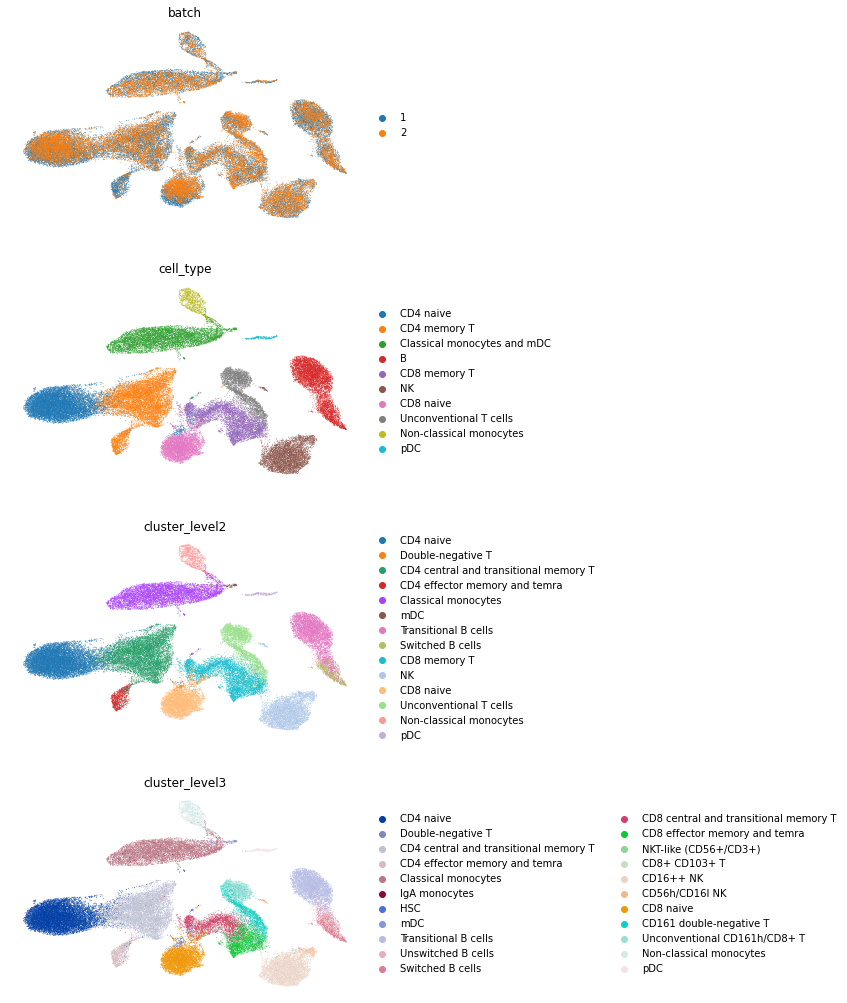

In [27]:
sc.pl.umap(z, color=['batch', 'cell_type', 'cluster_level2', 'cluster_level3'], ncols=1, frameon=False)